<h1>Machine Learning with Python</h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('loan_train.csv')
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

<h2>Data visualization and pre-processing</h2>

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

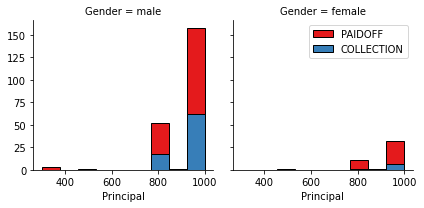

In [10]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

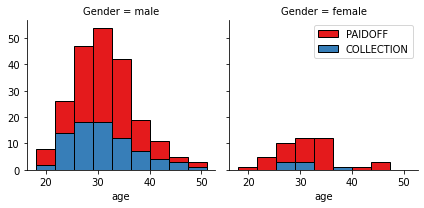

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<h2>Pre-processing: Feature selection/extraction</h2>

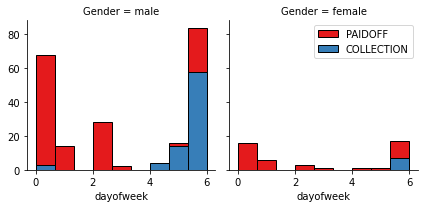

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


<h2>Convert Categorical features to numerical values</h2>

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


<h2>One Hot Encoding</h2>

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [20]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [21]:
y = df['loan_status'].values
y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

<h2>Doing Train test split</h2>

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40, random_state=5)

In [23]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (207, 8) (207,)
Test set: (139, 8) (139,)


In [24]:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(207, 8)

(207,)

(139, 8)

(139,)

<h2>Normalize Data</h2>

In [25]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_train[0:5]

array([[ 0.52533066, -0.97207061,  0.53495582, -0.45109685,  0.85993942,
         2.76134025, -0.86846836, -0.91206272],
       [ 0.52533066,  0.91317564, -0.47326137,  2.21681883,  0.85993942,
        -0.36214298, -0.86846836,  1.09641582],
       [ 0.52533066,  0.91317564, -0.13718897, -0.45109685,  0.85993942,
        -0.36214298,  1.15145243, -0.91206272],
       [ 0.52533066,  0.91317564, -0.64129757, -0.45109685,  0.85993942,
        -0.36214298, -0.86846836,  1.09641582],
       [ 0.52533066, -0.97207061, -0.47326137,  2.21681883, -1.16287262,
        -0.36214298, -0.86846836,  1.09641582]])

<h2>Classification</h2>

<h3>K Nearest Neighbor(KNN)</h3>

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
n = 25
accuracy = np.zeros(n)
for i in range(1,n+1):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    y_test_predicted = clf.predict(X_test)
    accuracy[i-1] = (accuracy_score(y_test, y_test_predicted))
accuracy

array([0.64748201, 0.69064748, 0.66906475, 0.71223022, 0.69064748,
       0.69064748, 0.65467626, 0.69784173, 0.64028777, 0.70503597,
       0.69784173, 0.69784173, 0.69064748, 0.69784173, 0.66906475,
       0.69064748, 0.6618705 , 0.67625899, 0.67625899, 0.67625899,
       0.70503597, 0.70503597, 0.71942446, 0.74100719, 0.74100719])

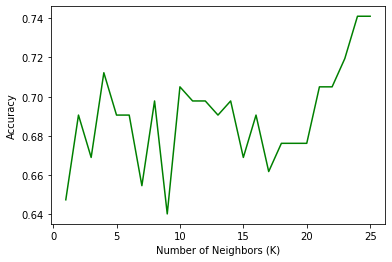

Maximum Accuracy Got is - 


,0
24,0.741007


In [29]:
plt.plot(range(1,n+1),accuracy,'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()

accuracy = pd.DataFrame(accuracy)
print("Maximum Accuracy Got is - " )
accuracy.sort_values(by = 0, ascending = False)[0:1]

In [30]:
clf_KNN = KNeighborsClassifier(n_neighbors = 24).fit(X_train, y_train)

<h3>Decision Tree</h3>

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf2 = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)
y_test_pred_KNN = clf.predict(X_test)
print("Accuracy using criterion as gini - ", accuracy_score(y_test, y_test_pred_KNN))
clf3 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)
y_test_pred_KNN = clf2.predict(X_test)
print("Accuracy using criterion as entropy - ", accuracy_score(y_test, y_test_pred_KNN))

Accuracy using criterion as gini -  0.7410071942446043
Accuracy using criterion as entropy -  0.6474820143884892


In [33]:
clf_DT = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)

<h3>Support Vector Machine</h3>

In [34]:
from sklearn.svm import SVC

In [35]:
clf4 = SVC(kernel = 'poly').fit(X_train, y_train)
print("accuracy using polynomial kernel - ", accuracy_score(y_test, clf2.predict(X_test)))
clf5 = SVC(kernel = 'rbf').fit(X_train, y_train)
print("accuracy using Radial Basis function kernel - ", accuracy_score(y_test, clf3.predict(X_test)))

accuracy using polynomial kernel -  0.6474820143884892
accuracy using Radial Basis function kernel -  0.6402877697841727


In [36]:
clf_SVM = SVC(kernel = 'poly', random_state = 4).fit(X_train, y_train)

<h3>Logistic Regression</h3>

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf_LR = LogisticRegression(solver='lbfgs', warm_start = True)
clf_LR.fit(X_train, y_train)

LogisticRegression(warm_start=True)

<h3>Model Evaluation using Test set</h3>

In [43]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [45]:
test_df = pd.read_csv('loan_train.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [46]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [47]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [48]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [49]:
X_t = test_df[['Principal','terms','age','Gender','weekend']]
X_t = pd.concat([X_t,pd.get_dummies(test_df['education'])], axis=1)
X_t.drop(['Master or Above'], axis = 1,inplace=True)
X_t.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [50]:
X_t = preprocessing.StandardScaler().fit(X_t).transform(X_t)
X_t[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [51]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [52]:
y_t = test_df['loan_status'].values
y_t[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [53]:
Jaccard = np.full(4, np.nan)
F1_score = np.full(4, np.nan)
LogLoss = np.full(4, np.nan)
Algorithm = np.array(4)
Algorithm = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]

In [55]:
Jaccard[0] = jaccard_score(y_t, clf_KNN.predict(X_t))
Jaccard[1] = jaccard_score(y_t, clf_DT.predict(X_t))
Jaccard[2] = jaccard_score(y_t, clf_SVM.predict(X_t))
Jaccard[3] = jaccard_score(y_t, clf_LR.predict(X_t))

In [56]:
F1_score[0] = f1_score(y_t, clf_KNN.predict(X_t))
F1_score[1] = f1_score(y_t, clf_DT.predict(X_t))
F1_score[2] = f1_score(y_t, clf_SVM.predict(X_t))
F1_score[3] = f1_score(y_t, clf_LR.predict(X_t))

In [57]:
LogLoss[3] = log_loss(y_t, clf_LR.predict_proba(X_t))

In [58]:
Report = pd.DataFrame({"Jaccard":Jaccard, "F1-score":F1_score, "LogLoss":LogLoss}, index=Algorithm)

<h3>Report</h3>

In [59]:
Report

,Jaccard,F1-score,LogLoss
KNN,0.054945,0.104167,NaN
Decision Tree,0.458716,0.628931,NaN
SVM,0.068182,0.127660,NaN
LogisticRegression,0.134021,0.236364,0.443987
